In [45]:
import pandas as pd 
import seaborn as sns
# as = alias

%matplotlib inline

# Load Dataset

In [248]:
train = pd.read_csv('~/Git/DSSchool_Study/lectureMaterials/sample_data_bikeSharingDemand/train.csv')
test = pd.read_csv('~/Git/DSSchool_Study/lectureMaterials/sample_data_bikeSharingDemand/test.csv')
sampleSusbmission = pd.read_csv('~/Git/DSSchool_Study/lectureMaterials/sample_data_bikeSharingDemand/sampleSubmission.csv')

In [249]:
print(train.shape)
train.head(2)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [250]:
print(test.shape)
test.head(2)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


# Preprocessing
### - Parse datetime

In [251]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [415]:
train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

train['datetime-weekday'] = train['datetime'].dt.weekday
train['datetime-dayofweek'] = train['datetime'].dt.dayofweek

datelist = ["datetime-year", 'datetime-hour', 'datetime-dayofweek']
train[datelist].head()

,datetime-year,datetime-hour,datetime-dayofweek
0,2011,0,5
1,2011,1,5
2,2011,2,5
3,2011,3,5
4,2011,4,5


In [416]:
train['datetime-weekday'].head()

0    5
1    5
2    5
3    5
4    5
Name: datetime-weekday, dtype: int64

In [417]:
test['datetime-year'] = test['datetime'].dt.year
test['datetime-month'] = test['datetime'].dt.month
test['datetime-day'] = test['datetime'].dt.day
test['datetime-hour'] = test['datetime'].dt.hour
test['datetime-minute'] = test['datetime'].dt.minute
test['datetime-second'] = test['datetime'].dt.second

# 요일
test['datetime-weekday'] = test['datetime'].dt.weekday
test['datetime-dayofweek'] = test['datetime'].dt.dayofweek

test[datelist].head()

,datetime-year,datetime-hour,datetime-dayofweek
0,2011,0,3
1,2011,1,3
2,2011,2,3
3,2011,3,3
4,2011,4,3


# Explore

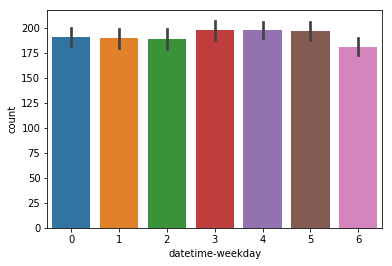

In [281]:
sns.barplot(data=train, x='datetime-weekday', y='count')
# train[['datetime-weekday', 'workingday']]

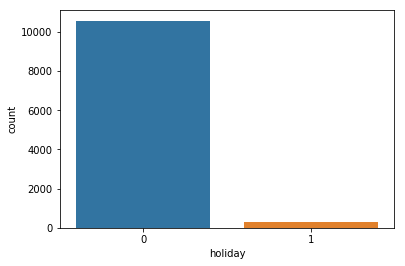

In [282]:
sns.countplot(data=train, x='holiday')

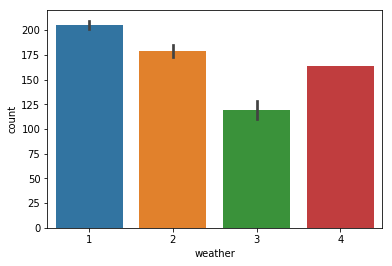

In [283]:
sns.barplot(data=train, x='weather', y='count')

In [284]:
train[train['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-weekday
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0,0


- weather == 4 일때 편차가 없는 이유는?
  - 데이터가 하나밖에 없기 때문!

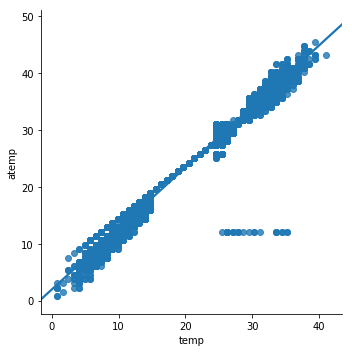

In [285]:
sns.lmplot(data=train, x="temp", y="atemp")

In [333]:
temp_lower = train['temp'] < 40
temp_higher = train['temp'] > 20
atemp_lower = train['atemp'] < 20
atemp_higher = train['atemp'] > 10

temp_outlier = train[temp_lower & temp_higher & atemp_lower & atemp_higher]
# temp_outlier.mean()

temp_29 = train['temp'] >= 29.5
temp_30 = train['temp'] <= 30
train[temp_29 & temp_30].mean().atemp

33.784433427762096

In [341]:
train.loc[temp_lower & temp_higher & atemp_lower & atemp_higher, 'atemp'] = train[temp_29 & temp_30].mean().atemp

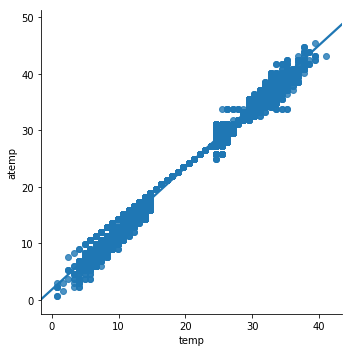

In [342]:
sns.lmplot(data=train, x="temp", y="atemp")

- 아웃라이어 발견! 보정하면 더 정확해질지도?!

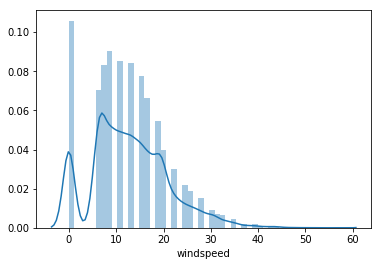

In [270]:
sns.distplot(train["windspeed"])

In [370]:
# train[]

weather_1 = train['weather'] == 1
weather_2 = train['weather'] == 2
weather_3 = train['weather'] == 3
weather_4 = train['weather'] == 4

windspeed_zero = train['windspeed'] == 0

In [371]:
train.loc[weather_1 & windspeed_zero, 'windspeed'] = train[weather_1].mean().windspeed
train.loc[weather_2 & windspeed_zero, 'windspeed'] = train[weather_2].mean().windspeed
train.loc[weather_3 & windspeed_zero, 'windspeed'] = train[weather_3].mean().windspeed
train.loc[weather_4 & windspeed_zero, 'windspeed'] = train[weather_4].mean().windspeed

In [373]:
train[windspeed_zero]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second,datetime-weekday


## Additional

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


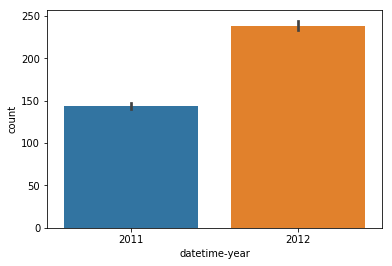

In [389]:
sns.barplot(data=train, x="datetime-year", y="count")

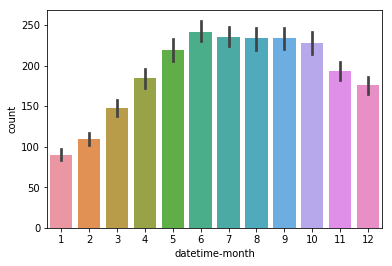

In [390]:
sns.barplot(data=train, x="datetime-month", y="count")

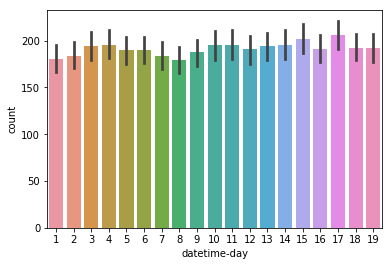

In [391]:
sns.barplot(data=train, x="datetime-day", y="count")

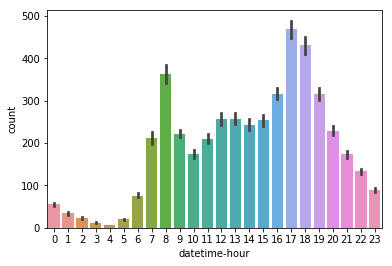

In [392]:
sns.barplot(data=train, x="datetime-hour", y="count")

In [400]:
"2011" + "-" + "1"

'2011-1'

In [401]:
train['datetime-year_month'] = train["datetime"].dt.year.astype(str) + '-' + train['datetime'].dt.month.astype(str)

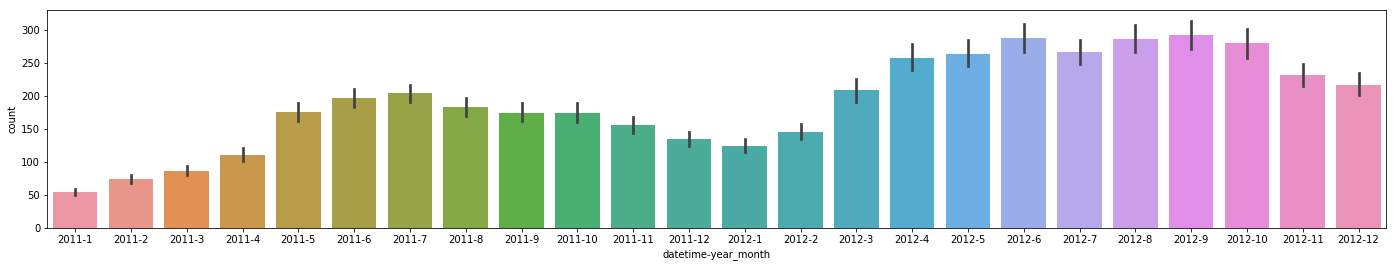

In [404]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,4))
sns.barplot(data=train, x="datetime-year_month", y="count")

In [405]:
# month는 다른 해의 동월을 비교했을 때 차이가 많이 나기 때문에 별로 의미가 없을 것 같다. 고 함.

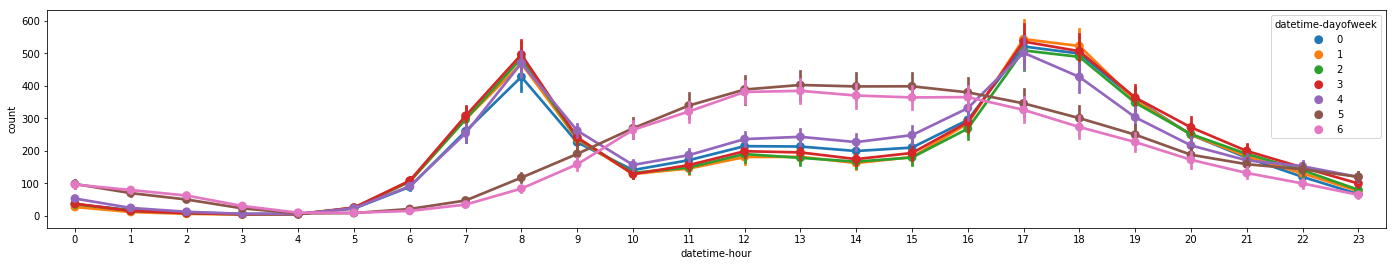

In [418]:
plt.figure(figsize=(24,4))
sns.pointplot(data=train, x="datetime-hour", y='count', hue='datetime-dayofweek')
# 월요일 0 ~ 일요일 6

# Train

In [420]:
feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
feature_names += datelist
feature_names

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'datetime-year',
 'datetime-hour',
 'datetime-dayofweek']

In [421]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,14.735388,2011,0,5
1,1,0,0,1,9.02,13.635,80,14.735388,2011,1,5
2,1,0,0,1,9.02,13.635,80,14.735388,2011,2,5
3,1,0,0,1,9.84,14.395,75,14.735388,2011,3,5
4,1,0,0,1,9.84,14.395,75,14.735388,2011,4,5


In [422]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [423]:
label = "count"
y_train = train[label]
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [424]:
label_casual = "casual"
y_train_casual = train[label_casual]
y_train_casual.head()

0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64

In [425]:
label_registered = "registered"
y_train_registered = train[label_registered]
y_train_registered.head()

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64

# Use Decision Tree

In [195]:
# from sklearn.tree import  DecisionTreeClassifier

# model = DecisionTreeClassifier()
# model

In [196]:
# from sklearn.tree import  DecisionTreeRegressor

# model = DecisionTreeRegressor()
# model

# Use RandomForest

- decision tree를 랜덤으로 여러개 만들어서 숲을 만든 다음 학습을 시킨다.

In [434]:
from sklearn.ensemble import RandomForestRegressor

#random_state를 바꾸면 더 좋게나온다고???????? 42????????
model = RandomForestRegressor(random_state=42)
casual_model = RandomForestRegressor(random_state=42)
registered_model = RandomForestRegressor(random_state=42)

# Prediction

In [435]:
model.fit(X_train, y_train)
casual_model.fit(X_train, y_train_casual)
registered_model.fit(X_train, y_train_registered)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [436]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(6493,)


array([10.9,  5.5,  4.3, ..., 98.3, 96.3, 49.4])

In [437]:
casual_predictions = casual_model.predict(X_test)
casual_predictions.shape
casual_predictions

array([2.3, 1.2, 1.6, ..., 6.5, 3.1, 2.1])

In [438]:
registered_predictions = registered_model.predict(X_test)
registered_predictions.shape
registered_predictions

array([ 10. ,   6. ,   1.5, ..., 103.7,  92.4,  43.9])

# Submit

In [439]:
sampleSusbmission['count'] = casual_predictions + registered_predictions

In [440]:
sampleSusbmission

,datetime,count
0,2011-01-20 00:00:00,12.3
1,2011-01-20 01:00:00,7.2
2,2011-01-20 02:00:00,3.1
3,2011-01-20 03:00:00,2.1
4,2011-01-20 04:00:00,2.4
5,2011-01-20 05:00:00,6.5
6,2011-01-20 06:00:00,39.0
7,2011-01-20 07:00:00,101.5
8,2011-01-20 08:00:00,241.9
9,2011-01-20 09:00:00,134.2


In [441]:
sampleSusbmission.to_csv('~/Git/DSSchool_Study/lectureMaterials/sample_data_bikeSharingDemand/with_teacher_42.csv', index=False)

# Classification VS Regression

- 맞춰야 하는 정답의 특징(categorical / continuous)에 따라 문제 유형이 다름

| 구분 | classification | regression |
| --- | --- | ----------- |
| 특징 | categorical | continuous |
| 예시 | 암환자 예측(양성/음성) | 부동산 가격 예측 |